# Library

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


import datetime

In [79]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

# Import the Data

In [8]:
test = pd.read_csv("test_1eLl9Yf.csv")
train = pd.read_csv("train_fwYjLYX.csv")
smaple_submission = pd.read_csv("sample_submission_IIzFVsf.csv")

In [13]:
test.head(3)

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
id                  180 non-null int64
application_date    180 non-null object
segment             180 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.3+ KB


In [15]:
test.isnull().sum()

id                  0
application_date    0
segment             0
dtype: int64

In [16]:
train.head(3)

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [18]:
train.isnull().sum()

application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64

In [19]:
smaple_submission.head(2)

,id,application_date,segment,case_count
0,1,2019-07-06,1,5
1,2,2019-07-07,1,5


In [20]:
smaple_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
id                  180 non-null int64
application_date    180 non-null object
segment             180 non-null int64
case_count          180 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.8+ KB


In [21]:
smaple_submission.isna().sum()

id                  0
application_date    0
segment             0
case_count          0
dtype: int64

# Split Year, Month, Day

In [22]:
date_pattern = "%Y-%m-%d"

In [23]:
def split_date(x):
    return datetime.datetime.strptime(x, date_pattern).month



In [24]:
# test.application_date.apply( lambda x : split_date(x))

In [25]:
test["year"] = test.application_date.apply(lambda x : datetime.datetime.strptime(x, date_pattern).year)
test["month"] = test.application_date.apply(lambda x : datetime.datetime.strptime(x, date_pattern).month)
test["day"] = test.application_date.apply(lambda x : datetime.datetime.strptime(x, date_pattern).day)

In [26]:
train["year"] = train.application_date.apply(lambda x : datetime.datetime.strptime(x, date_pattern).year)
train["month"] = train.application_date.apply(lambda x : datetime.datetime.strptime(x, date_pattern).month)
train["day"] = train.application_date.apply(lambda x : datetime.datetime.strptime(x, date_pattern).day)

In [27]:
test.head(3)

,id,application_date,segment,year,month,day
0,1,2019-07-06,1,2019,7,6
1,2,2019-07-07,1,2019,7,7
2,3,2019-07-08,1,2019,7,8


In [28]:
train.head(3)

,application_date,segment,branch_id,state,zone,case_count,year,month,day
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,4,1
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,4,3
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,4


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
id                  180 non-null int64
application_date    180 non-null object
segment             180 non-null int64
year                180 non-null int64
month               180 non-null int64
day                 180 non-null int64
dtypes: int64(5), object(1)
memory usage: 8.6+ KB


# Visualization

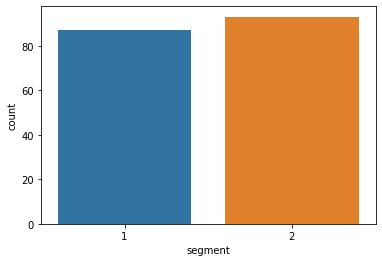

In [30]:
sns.countplot(x = "segment" , data = test)
plt.show()

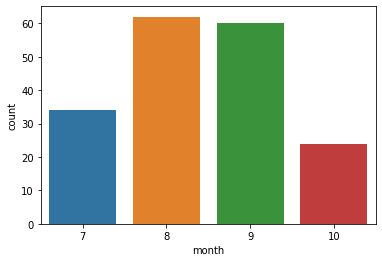

In [31]:
sns.countplot(x = "month" , data = test)
plt.show()

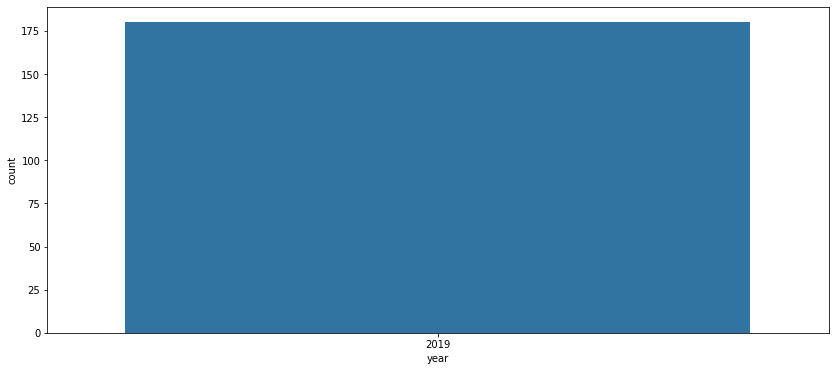

In [32]:
plt.figure(figsize=(14,6))
sns.countplot(x = "year" , data = test)
plt.show()

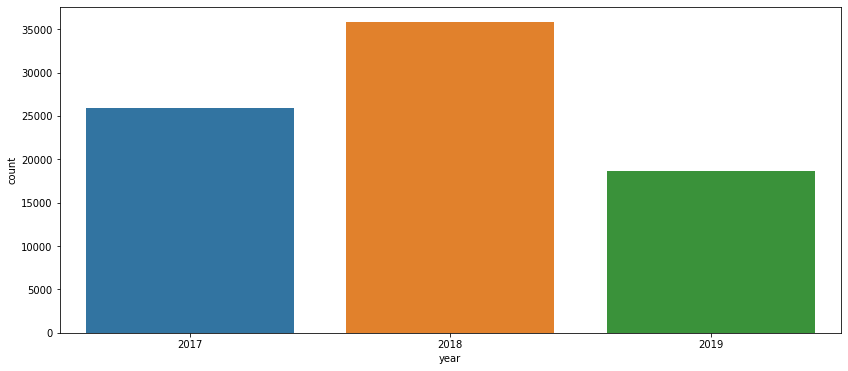

In [33]:
plt.figure(figsize=(14,6))
sns.countplot(x = "year" , data = train)
plt.show()

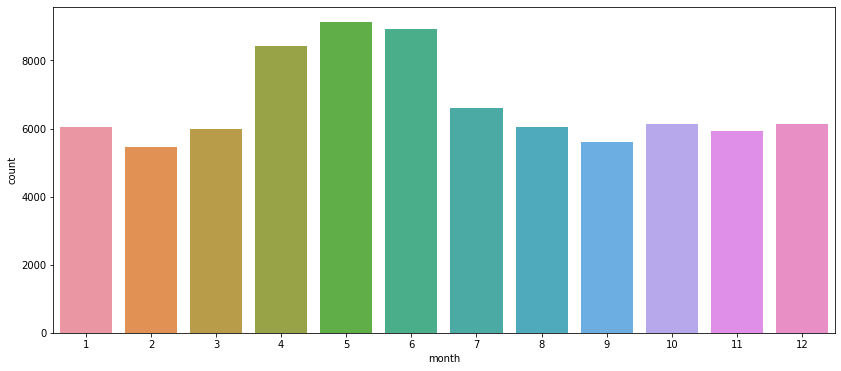

In [34]:
plt.figure(figsize=(14,6))
sns.countplot(x = "month" , data = train)
plt.show()

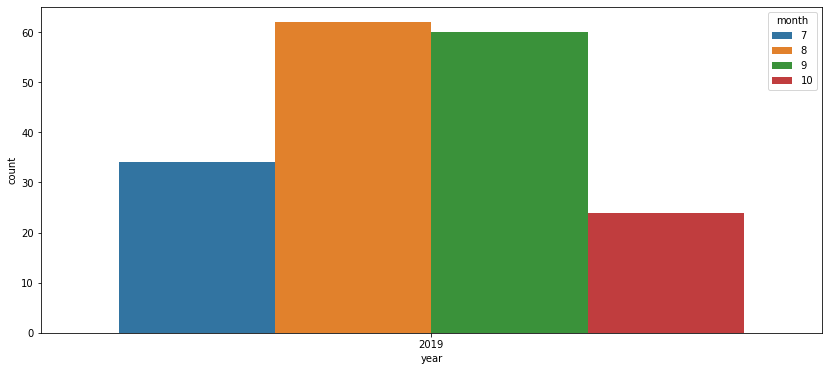

In [35]:
plt.figure(figsize=(14,6))
sns.countplot(x = "year" , data = test, hue="month")
plt.show()

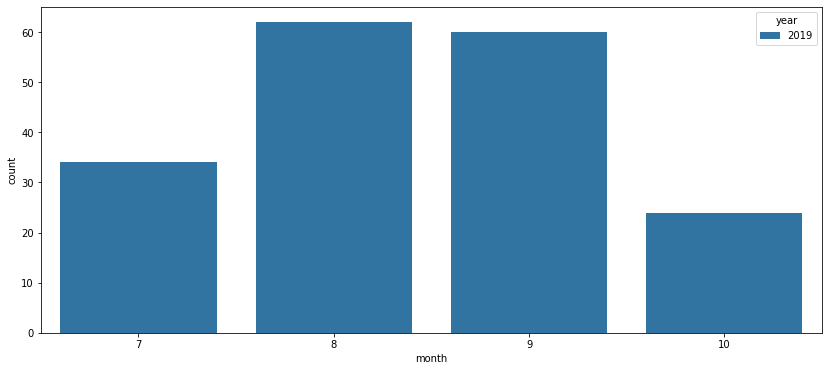

In [36]:
plt.figure(figsize=(14,6))
sns.countplot(x = "month" , data = test, hue="year")
plt.show()

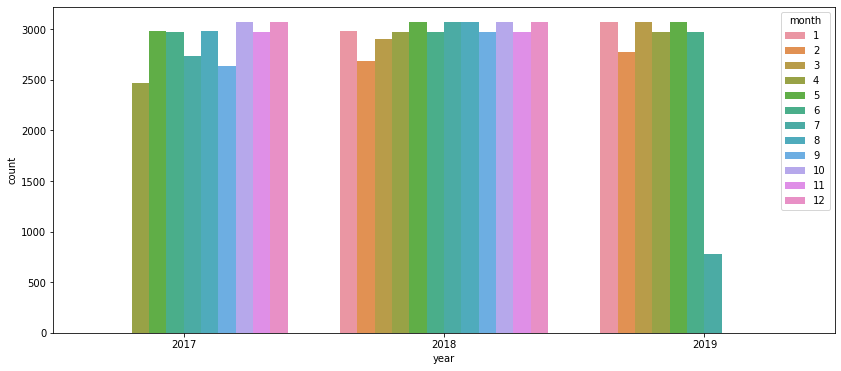

In [37]:
plt.figure(figsize=(14,6))
sns.countplot(x = "year" , data = train, hue="month")
plt.show()

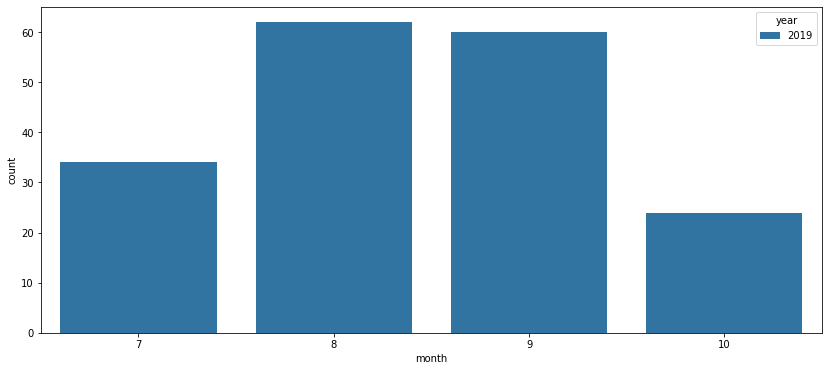

In [38]:
plt.figure(figsize=(14,6))
sns.countplot(x = "month" , data = test, hue="year")
plt.show()

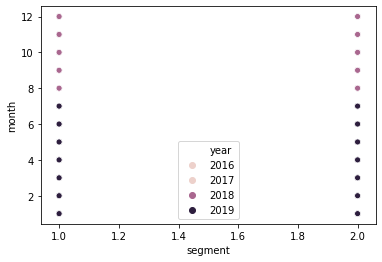

In [39]:
g = sns.scatterplot(x="segment", y="month", hue="year", data=train)

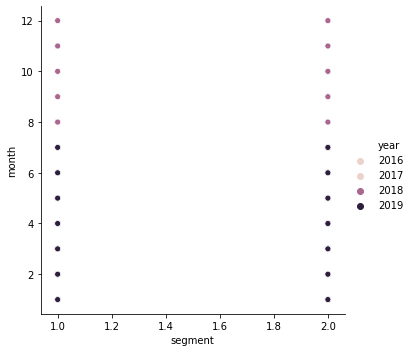

In [40]:
g = sns.relplot(x="segment", y="month", hue="year", data=train)

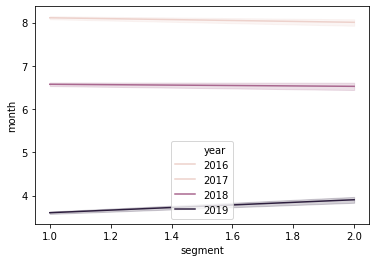

In [41]:
g = sns.lineplot(x="segment", y="month", hue="year", data=train)

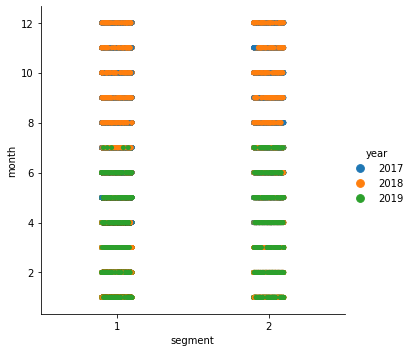

In [42]:
g = sns.catplot(x="segment", y="month", hue="year", data=train)

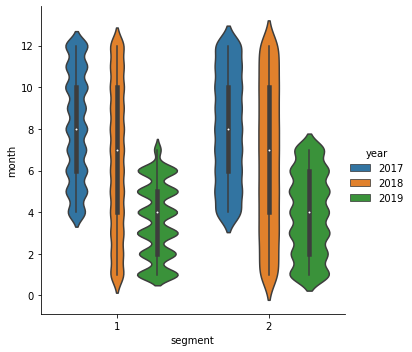

In [43]:
g = sns.catplot(x="segment", y="month", hue="year", data=train, kind="violin")

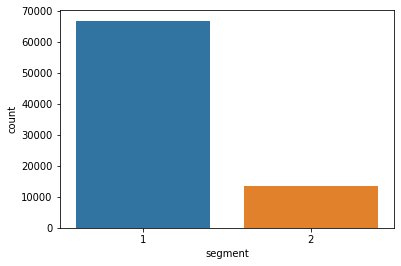

In [44]:
sns.countplot(x = "segment" , data = train)
plt.show()

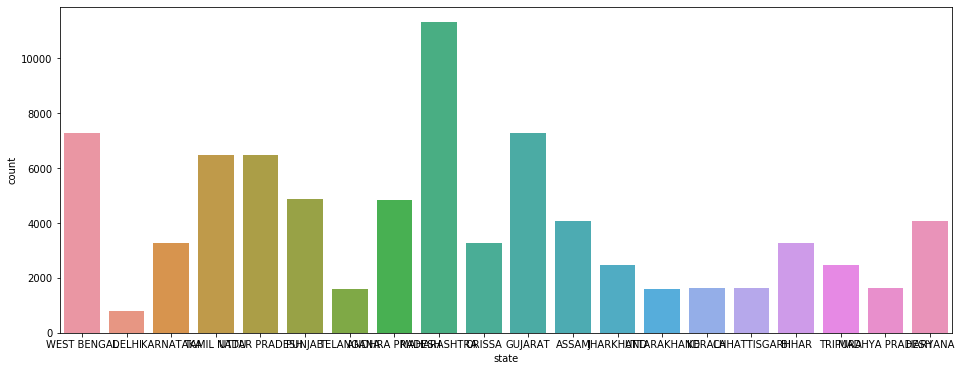

In [45]:
plt.figure(figsize=(16,6))
sns.countplot(x = "state" , data = train)
plt.show()

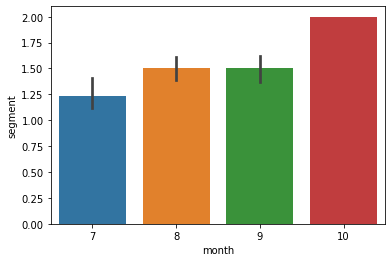

In [46]:
sns.barplot( x= "month" , y = "segment" , data = test)
plt.show()

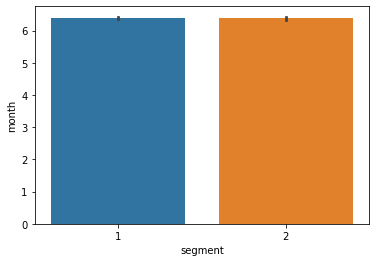

In [101]:
sns.barplot( x= "segment" , y = "month" , data = train)
plt.show()

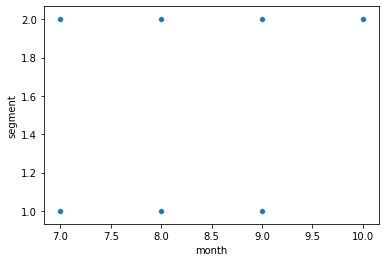

In [48]:
sns.scatterplot( x= "month" , y = "segment" , data = test)
plt.show()

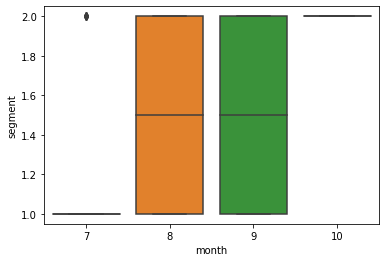

In [49]:
sns.boxplot( x= "month" , y = "segment" , data = test)
plt.show()

In [50]:
test.segment.value_counts()

2    93
1    87
Name: segment, dtype: int64

In [51]:
test.id.value_counts()

180    1
67     1
65     1
64     1
63     1
      ..
119    1
118    1
117    1
116    1
1      1
Name: id, Length: 180, dtype: int64

In [52]:
test.year.value_counts()

2019    180
Name: year, dtype: int64

In [53]:
test.month.value_counts()

8     62
9     60
7     34
10    24
Name: month, dtype: int64

In [54]:
train.segment.value_counts()

1    66898
2    13504
Name: segment, dtype: int64

In [55]:
train.zone.value_counts()

EAST       21762
SOUTH      18538
WEST       16926
NORTH       8060
CENTRAL     1612
Name: zone, dtype: int64

In [56]:
train.state.value_counts()

MAHARASHTRA       11322
GUJARAT            7292
WEST BENGAL        7292
TAMIL NADU         6486
UTTAR PRADESH      6486
PUNJAB             4874
ANDHRA PRADESH     4836
HARYANA            4068
ASSAM              4068
ORISSA             3262
BIHAR              3262
KARNATAKA          3262
TRIPURA            2456
JHARKHAND          2456
KERALA             1650
CHHATTISGARH       1650
MADHYA PRADESH     1650
TELANGANA          1612
UTTARAKHAND        1612
DELHI               806
Name: state, dtype: int64

In [57]:
train.case_count.value_counts()

0.0       22207
1.0        1256
11.0       1151
10.0       1121
8.0        1097
          ...  
7665.0        1
2809.0        1
2164.0        1
3220.0        1
1568.0        1
Name: case_count, Length: 3245, dtype: int64

In [58]:
train.branch_id.value_counts()

159.0    806
29.0     806
67.0     806
269.0    806
74.0     806
        ... 
101.0    806
61.0     806
5.0      806
72.0     806
1.0      806
Name: branch_id, Length: 83, dtype: int64

In [59]:
train.month.value_counts()

5     9124
6     8910
4     8412
7     6589
12    6138
10    6138
8     6055
1     6055
3     5972
11    5940
9     5608
2     5461
Name: month, dtype: int64

In [60]:
train.year.value_counts()

2018    35803
2017    25897
2019    18702
Name: year, dtype: int64

In [61]:
test.year.value_counts()

2019    180
Name: year, dtype: int64

In [62]:
train.month.value_counts()

5     9124
6     8910
4     8412
7     6589
12    6138
10    6138
8     6055
1     6055
3     5972
11    5940
9     5608
2     5461
Name: month, dtype: int64

# Feature Engineering

In [63]:
train.head(2)

,application_date,segment,branch_id,state,zone,case_count,year,month,day
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,4,1
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,4,3


In [64]:
x_train = train.drop("case_count", axis=1)
y_train = train.loc[:,"case_count"]

In [65]:
x_test = test

In [66]:
x_test = x_test.drop(["id", "application_date"], axis=1)

In [67]:
x_test.head(1)

,segment,year,month,day
0,1,2019,7,6


In [68]:
x_train.head(1)

,application_date,segment,branch_id,state,zone,year,month,day
0,2017-04-01,1,1.0,WEST BENGAL,EAST,2017,4,1


In [83]:
x_train = x_train.drop(["branch_id" , "state", "application_date", "zone"], axis = 1)

In [84]:
x_train.head(1)

,segment,year,month,day
0,1,2017,4,1


In [85]:
test.head(1)

,id,application_date,segment,year,month,day
0,1,2019-07-06,1,2019,7,6


In [86]:
# test_date = test.pop('application_date')
# test_id = test.pop('id')

test_date = test.loc[:,"application_date"]
test_id = test.loc[:,"id"]

In [87]:
test_date.head(1)

0    2019-07-06
Name: application_date, dtype: object

In [88]:
x_train.head(1)

,segment,year,month,day
0,1,2017,4,1


In [93]:
x_train.shape, x_test.shape

((80402, 4), (180, 4))

In [89]:
test_id.head(1)

0    1
Name: id, dtype: int64

In [90]:
lm = LinearRegression()
lm.fit(x_train , y_train)

predict_y = lm.predict(x_test)



# lm = RandomForestRegressor()
# lm.fit(x_train , y_train)

# predict_y = lm.predict(x_test)

In [91]:
predict_y.size

180

In [77]:
final = pd.DataFrame()
final['id'] = test_id
final['application_date'] = test_date
final['segment'] = test['segment']
final['case_count'] = predict_y
final.to_csv('rakesh.csv', index=False)

NameError: name 'predict_y' is not defined

In [263]:
final.head(10)

,id,application_date,segment,case_count
0,1,2019-07-06,1,4.318924
1,2,2019-07-07,1,5.317746
2,3,2019-07-08,1,3.279701
3,4,2019-07-09,1,4.135256
4,5,2019-07-10,1,9.467878
5,6,2019-07-11,1,8.632671
6,7,2019-07-12,1,9.751288
7,8,2019-07-13,1,8.462747
8,9,2019-07-14,1,9.631250
9,10,2019-07-15,1,6.695525


In [ ]:
mean_absolute_error()

# Feature Engnieering 2

In [9]:
test.head(10)

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1
5,6,2019-07-11,1
6,7,2019-07-12,1
7,8,2019-07-13,1
8,9,2019-07-14,1
9,10,2019-07-15,1


In [110]:
test[160:180]

,id,application_date,segment,year,month,day
160,161,2019-10-05,2,2019,10,5
161,162,2019-10-06,2,2019,10,6
162,163,2019-10-07,2,2019,10,7
163,164,2019-10-08,2,2019,10,8
164,165,2019-10-09,2,2019,10,9
165,166,2019-10-10,2,2019,10,10
166,167,2019-10-11,2,2019,10,11
167,168,2019-10-12,2,2019,10,12
168,169,2019-10-13,2,2019,10,13
169,170,2019-10-14,2,2019,10,14


In [100]:
test.segment.value_counts()

2    93
1    87
Name: segment, dtype: int64

In [102]:
train.head(10)

,application_date,segment,branch_id,state,zone,case_count,year,month,day
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,4,1
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,4,3
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,4
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,4,5
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,4,7
5,2017-04-12,1,1.0,WEST BENGAL,EAST,123.0,2017,4,12
6,2017-04-13,1,1.0,WEST BENGAL,EAST,81.0,2017,4,13
7,2017-04-14,1,1.0,WEST BENGAL,EAST,117.0,2017,4,14
8,2017-04-15,1,1.0,WEST BENGAL,EAST,127.0,2017,4,15
9,2017-04-16,1,1.0,WEST BENGAL,EAST,42.0,2017,4,16


In [113]:
train.tail(50)

,application_date,segment,branch_id,state,zone,case_count,year,month,day
80352,2019-06-04,2,NaN,WEST BENGAL,NaN,244.0,2019,6,4
80353,2019-06-05,2,NaN,WEST BENGAL,NaN,265.0,2019,6,5
80354,2019-06-06,2,NaN,WEST BENGAL,NaN,316.0,2019,6,6
80355,2019-06-07,2,NaN,WEST BENGAL,NaN,412.0,2019,6,7
80356,2019-06-08,2,NaN,WEST BENGAL,NaN,424.0,2019,6,8
80357,2019-06-09,2,NaN,WEST BENGAL,NaN,462.0,2019,6,9
80358,2019-06-10,2,NaN,WEST BENGAL,NaN,724.0,2019,6,10
80359,2019-06-11,2,NaN,WEST BENGAL,NaN,2039.0,2019,6,11
80360,2019-06-12,2,NaN,WEST BENGAL,NaN,2321.0,2019,6,12
80361,2019-06-13,2,NaN,WEST BENGAL,NaN,2481.0,2019,6,13


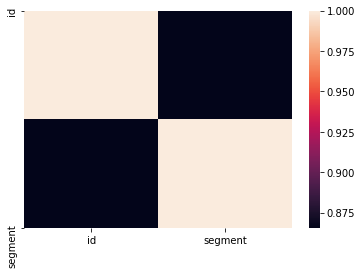

In [11]:
sns.heatmap(test.corr())

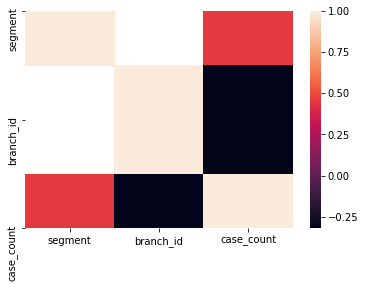

In [12]:
sns.heatmap(train.corr())

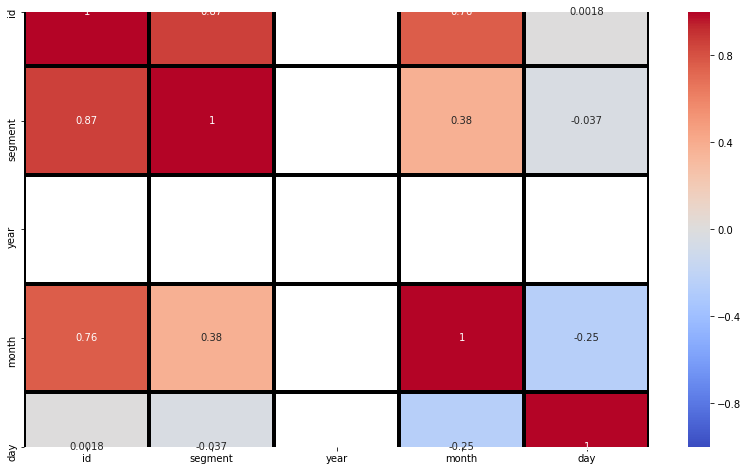

In [98]:
plt.figure(figsize=(14,8))
sns.heatmap(test.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


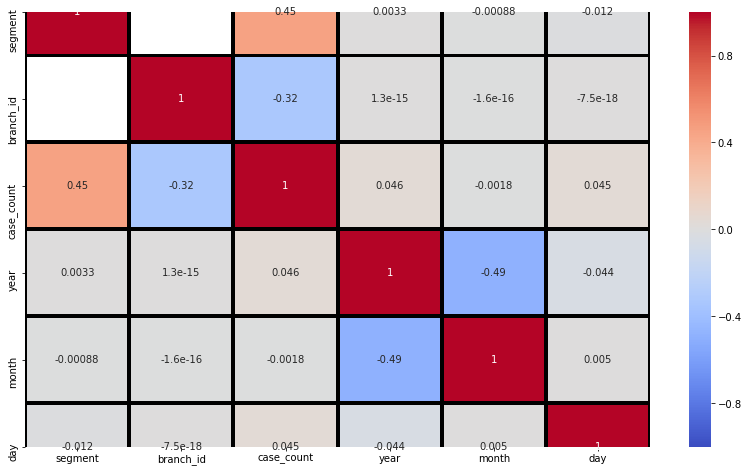

In [97]:
plt.figure(figsize=(14,8))
sns.heatmap(train.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()